We start importing the libraries that we need:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os 

Now, we import the data:

In [127]:
train_dataset = pd.read_csv('../data/train.csv')

Let's take a look how the data looks like:

In [4]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Data analysis

In [8]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
test_dataset.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [50]:
train_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [32]:
train_dataset[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [12]:
train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
train_dataset[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


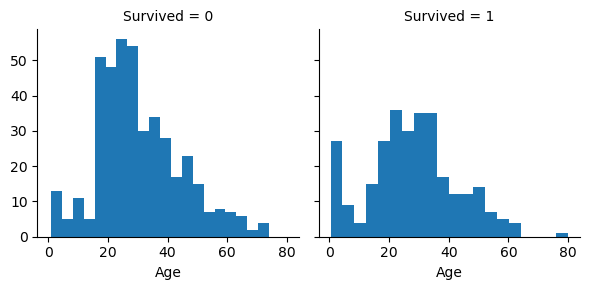

In [20]:
g = sns.FacetGrid(train_dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\ALEX\miniconda3\envs\Python-data-wranglig\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


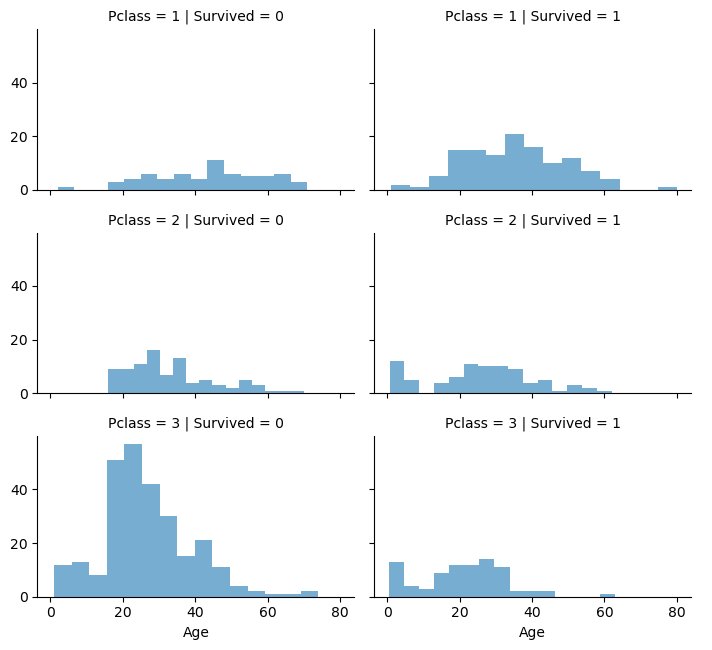

In [27]:
grid = sns.FacetGrid(train_dataset, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=15)
grid.add_legend()

C:\Users\ALEX\miniconda3\envs\Python-data-wranglig\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


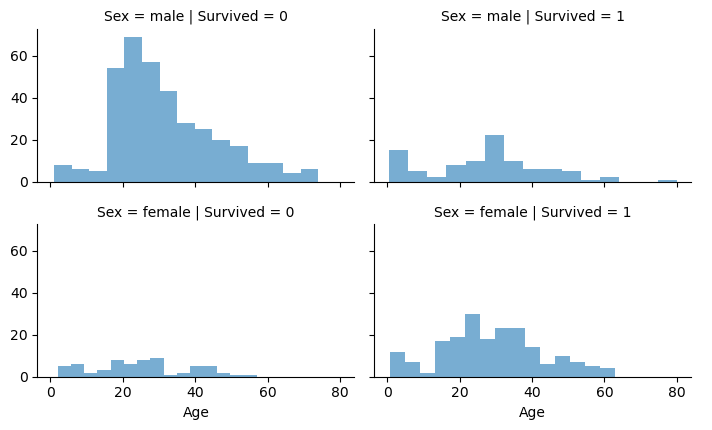

In [28]:
grid = sns.FacetGrid(train_dataset, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=15)
grid.add_legend()

In [6]:
train_dataset['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

C:\Users\ALEX\miniconda3\envs\Python-data-wranglig\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ALEX\miniconda3\envs\Python-data-wranglig\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ALEX\miniconda3\envs\Python-data-wranglig\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


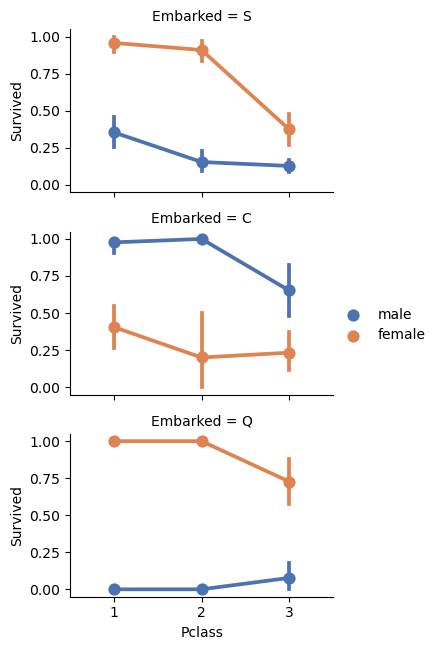

In [15]:
grid = sns.FacetGrid(train_dataset, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Data preparation

In [128]:
test_dataset = pd.read_csv('../data/test.csv')

In [129]:
tt = [train_dataset,test_dataset]

In [130]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
for dataset in tt:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male':0}).astype(int)
    #dataset['Embarked'] = dataset['Embarked'].map({'C': 0,'S': 1, 'Q':2,).astype(int)

In [133]:
train_dataset=train_dataset.drop(["Embarked",'Name',"Ticket","Cabin","Embarked","Age","Fare"], axis=1)
test_dataset=test_dataset.drop(["Embarked",'Name',"Ticket","Cabin","Embarked","Age","Fare"], axis=1)

In [116]:
train_dataset

,PassengerId,Survived,Pclass,Sex,SibSp,Parch
0,1,0,3,0,1,0
1,2,1,1,1,1,0
2,3,1,3,1,0,0
3,4,1,1,1,1,0
4,5,0,3,0,0,0
...,...,...,...,...,...,...
886,887,0,2,0,0,0
887,888,1,1,1,0,0
888,889,0,3,1,1,2
889,890,1,1,0,0,0


### Models 

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate


In [134]:
X_train = train_dataset.drop(["Survived","PassengerId"], axis=1)
Y_train = train_dataset["Survived"]
X_test  = test_dataset.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 4), (891,), (418, 4))

In [169]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.02

In [170]:
cv_results = cross_validate(logreg, X_train, Y_train, cv=5)
sorted(cv_results.keys())

cv_results['test_score']

array([0.81564246, 0.80898876, 0.80337079, 0.76404494, 0.80337079])

In [171]:
cv_results

{'fit_time': array([0.01598167, 0.01100349, 0.01399851, 0.0049994 , 0.0090003 ]),
 'score_time': array([0.00399971, 0.00599718, 0.00099659, 0.00199914, 0.00200057]),
 'test_score': array([0.81564246, 0.80898876, 0.80337079, 0.76404494, 0.80337079])}

In [61]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

80.47

In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

74.41

In [63]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.43

In [64]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.68

In [65]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\ALEX\miniconda3\envs\Python-data-wranglig\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.35

In [66]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.24

In [67]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

81.71

In [69]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

81.71

### Deep learning model

In [144]:
X_test

,Pclass,Sex,SibSp,Parch
0,3,0,0,0
1,3,1,1,0
2,2,0,0,0
3,3,0,0,0
4,3,1,1,1
...,...,...,...,...
413,3,0,0,0
414,1,1,0,0
415,3,0,0,0
416,3,0,0,0


In [145]:
X_test['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [298]:
X=pd.concat([X_train, X_test], ignore_index=False, axis=0)
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
x = one_hot_encoder.fit_transform(X).toarray()
x.shape

(1309, 20)

In [299]:
Xtest=x[891:]
Xtrain=x[:891]
Xtrain.shape,  Xtest.shape

((891, 20), (418, 20))

In [287]:
Xtrain[0:10].shape

(10, 20)

In [265]:
from sklearn.preprocessing import OneHotEncoder
# Converting categorical values to one-hot representation
#one_hot_encoder = OneHotEncoder(categories[0]==[1,2,3],                                categories[1]==[0,1],                                categories[2]==[0, 1, 2, 3, 4, 5, 8],                               categories[3] == [0, 1, 3, 2, 4, 6, 5, 9])
#one_hot_encoder = OneHotEncoder()
#one_hot_encoder = OneHotEncoder(categories=[0, 1, 3, 2, 4, 6, 5, 9])
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
Xtrain = one_hot_encoder.fit_transform(X_train).toarray()
Xtest = one_hot_encoder.fit_transform(X_test).toarray()
Xtrain.shape,  Xtest.shape

((891, 19), (418, 20))

In [323]:
Xtrain[179:890]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [301]:
one_hot_encoder.categories_

[array([1, 2, 3], dtype=int64),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 8], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 9], dtype=int64)]

In [300]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(Xtrain, Y_train.values, test_size = 0.1)

In [76]:
model = nn.Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

NameError: name 'nn' is not defined

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__() 
        
        self.layer_1 = nn.Linear(in_features=4, out_features=2) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=2, out_features=2)
        self.layer_3 = nn.Linear(in_features=2, out_features=1)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.layer_1(x))
        # If the size is a square, you can specify with a single number
        x = F.relu(self.layer_2(x))
        x = F.sigmoid(self.layer_3(x))
        return x


net = Net()
print(net)

Net(
  (layer_1): Linear(in_features=4, out_features=2, bias=True)
  (layer_2): Linear(in_features=2, out_features=2, bias=True)
  (layer_3): Linear(in_features=2, out_features=1, bias=True)
)


In [309]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 270)
        self.fc2 = nn.Linear(270, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        
        return x
    
net = Net()

batch_size = 10
num_epochs = 200
learning_rate = 0.01
batch_no = len(x_train) // batch_size

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [303]:
from sklearn.utils import shuffle
from torch.autograd import Variable

def train_model(num_epochs, x_train, y_train):
    for epoch in range(num_epochs):
        if epoch % 10 == 0:
            print('Epoch {}'.format(epoch+1))
        x_train, y_train = shuffle(x_train, y_train)
    # Mini batch learning
        for i in range(batch_no):
            start = i * batch_size
            end = start + batch_size
            x_var = Variable(torch.FloatTensor(x_train[start:end]))
            #print(x_var.shape)
            y_var = Variable(torch.LongTensor(y_train[start:end]))
        # Forward + Backward + Optimize
            optimizer.zero_grad()
            ypred_var = net(x_var)
            loss =criterion(ypred_var, y_var)
            loss.backward()
            optimizer.step()

In [304]:
start = 0 * batch_size
end = start + batch_size
x_train[start:end].shape

(10, 20)

In [310]:
train_model(num_epochs, x_train, y_train)

Epoch 1
Epoch 11
Epoch 21
Epoch 31
Epoch 41
Epoch 51
Epoch 61
Epoch 71
Epoch 81
Epoch 91
Epoch 101
Epoch 111
Epoch 121
Epoch 131
Epoch 141
Epoch 151
Epoch 161
Epoch 171
Epoch 181
Epoch 191


In [224]:
x_val

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [311]:
test_var = Variable(torch.FloatTensor(x_val), requires_grad=True)
with torch.no_grad():
    result = net(test_var)
values, labels = torch.max(result, 1)
num_right = np.sum(labels.data.numpy() == y_val)
print('Accuracy {:.2f}'.format(num_right / len(y_val)))

Accuracy 0.86


In [339]:
from sklearn.model_selection import KFold
indexs = np.array(range(0, Xtrain.shape[0]))
#indexs = range(0, Xtrain.shape[0])
np.random.shuffle(indexs)
kf = KFold(n_splits = 5)

corrects = []

for training,validation_data in kf.split(indexs):
    
    train_model(num_epochs, Xtrain[training], Y_train[training].values)
    test_var = Variable(torch.FloatTensor(Xtrain[validation_data]), requires_grad=True) 

    with torch.no_grad():
        result = net(test_var)
    values, labels = torch.max(result, 1)
    num_right = np.sum(labels.data.numpy() == Y_train[validation_data].values)
    corrects.append(num_right / len(Y_train[validation_data].values))
    print(corrects)

Epoch 1
Epoch 11
Epoch 21
Epoch 31
Epoch 41
Epoch 51
Epoch 61
Epoch 71
Epoch 81
Epoch 91
Epoch 101
Epoch 111
Epoch 121
Epoch 131
Epoch 141
Epoch 151
Epoch 161
Epoch 171
Epoch 181
Epoch 191
[0.7821229050279329]
Epoch 1
Epoch 11
Epoch 21
Epoch 31
Epoch 41
Epoch 51
Epoch 61
Epoch 71
Epoch 81
Epoch 91
Epoch 101
Epoch 111
Epoch 121
Epoch 131
Epoch 141
Epoch 151
Epoch 161
Epoch 171
Epoch 181
Epoch 191
[0.7821229050279329, 0.7808988764044944]
Epoch 1
Epoch 11
Epoch 21
Epoch 31
Epoch 41
Epoch 51
Epoch 61
Epoch 71
Epoch 81
Epoch 91
Epoch 101
Epoch 111
Epoch 121
Epoch 131
Epoch 141
Epoch 151
Epoch 161
Epoch 171
Epoch 181
Epoch 191
[0.7821229050279329, 0.7808988764044944, 0.8146067415730337]
Epoch 1
Epoch 11
Epoch 21
Epoch 31
Epoch 41
Epoch 51
Epoch 61
Epoch 71
Epoch 81
Epoch 91
Epoch 101
Epoch 111
Epoch 121
Epoch 131
Epoch 141
Epoch 151
Epoch 161
Epoch 171
Epoch 181
Epoch 191
[0.7821229050279329, 0.7808988764044944, 0.8146067415730337, 0.7696629213483146]
Epoch 1
Epoch 11
Epoch 21
Epoch 31
Epoch

In [343]:
sum(corrects)/len(corrects)

0.7968740192078336

In [312]:
# Applying model on the test data
X_test_var = Variable(torch.FloatTensor(Xtest), requires_grad=True) 

with torch.no_grad():
    test_result = net(X_test_var)
values, labels = torch.max(test_result, 1)
survived = labels.data.numpy()

In [313]:
survived

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Results

In [71]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,81.71
8,Decision Tree,81.71
0,Support Vector Machines,80.47
2,Logistic Regression,80.02
7,Linear SVC,79.35
6,Stochastic Gradient Decent,79.24
5,Perceptron,78.68
4,Naive Bayes,76.43
1,KNN,74.41
